# Import and preprocces data
To run this file you can press on 'Cell' and then on 'Run Cells'. You'll be asked multiple times to give input, this way you'll be able use the data in multiple ways. If you have more data in the future, you can add them in the same directory as the one with the Automonous Greenhouse Challenge teams. You can add new data by making a new directory. This directory needs to contain five csv files: Greenhouse_climate.csv, CropManagement.csv, Irrigation.csv, Production.csv and vip.csv. To run this specific code it's usefull to have the same features as the ones of the greenhouse challenge (see their ReedMe.pdf).

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize as minimize
import os

In [259]:
FileNotFound = True
while FileNotFound:
    try:
        directory = input("""Please add the directory you're data is in. 
        If you're using our original provided files this should be 'data'\n""")
        datasets = [filename for filename in os.listdir(directory)]
        FileNotFound = False
    except FileNotFoundError:
        print("Please add a valid directory")
        FileNotFound = True



Please add the directory you're data is in. 
        If you're using our original provided files this should be 'data'
data


In [260]:
data = {}
for dataset in datasets:
    GHClim = pd.read_csv(f"data/{dataset}/Greenhouse_climate.csv") 
    Crop = pd.read_csv(f"data/{dataset}/CropManagement.csv") 
    irri = pd.read_csv(f"data/{dataset}/Irrigation.csv") 
    prod = pd.read_csv(f"data/{dataset}/Production.csv") 
    vip = pd.read_csv(f"data/{dataset}/vip.csv") 
    GHClim = GHClim.drop(['VentLee', 'Ventwind', 'AssimLight', 'BlackScr', 'EnScr'], axis=1)
    
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    
    # If the last column is NaN
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    data[dataset] = {'GHClim':GHClim, 'Crop':Crop, 'irri':irri, 'prod':prod, 'vip':vip}

# Weekly average

Like mentioned the GHtime is the timestamp per 5 minutes. Every time it changes with +- 0.0034722, this is $\frac{1}{1440}$ of a day: 5 minutes. So the GHtime is in days. One week is 7 days, so if we would like to take the average of every week, we would need to take the average of time the GHtime, changed by 7. 1 week is 10080 minutes. So 1 week is $\frac{10080}{5}$ timestamps, is 2016 timestamps.

In [261]:
run = 'Maybe'
while run != 'Yes' and run != 'No':
    print('Please type Yes or No (case sensitive)')    
    run = str(input('Would you like to divide the data in weekly data? [Yes/No]'))

if run == 'Yes':
    # Create a dictionary with weekly data to create more usuable data
    weekly_data_per_team = dict()
    for dataset in datasets:
        # Add important features from greenhouse climate dataset
        weekly_CO2, weekly_HumDef = [], []
        for i in range(len(data[dataset]['GHClim']['GHtime'])//2016):
            weekly_HumDef.append(data[dataset]['GHClim']['HumDef'][i*2016:i*2016+2016].mean())
            weekly_CO2.append(data[dataset]['GHClim']['CO2air'][i*2016:i*2016+2016].mean())

        # Add weekly production value (fruit number multiplied by price) 
        weekly_prodA, weekly_prodB = [], []
        # Timestamp is per day 
        for i in range(len(data[dataset]['prod']['time'])//7):
            weekly_prodA.append(np.mean(data[dataset]['prod']['ProdA_num'][i*7:i*7+7]))
            weekly_prodB.append(np.mean(data[dataset]['prod']['ProdB_num'][i*7:i*7+7]))
        weekly_data_per_team[f'{dataset}'] = {'CO2air':weekly_CO2, 'HumDef':weekly_HumDef, 
                                'prodA':weekly_prodA, 'prodB':weekly_prodB}
    print("""The code is succesfully runned and the weekly data 
          devided by team is now in the variable 'weekly_data_per_team'""")

Please type Yes or No (case sensitive)
Would you like to divide the data in weekly data? [Yes/No]No


In [262]:
if run == 'Yes':
    # Create a dictionary with weekly data to create more usuable data
    weekly_CO2, weekly_HumDef = [], []
    weekly_prodA, weekly_prodB = [], []
    for team in teams:
        # Add important features from greenhouse climate dataset

        for i in range(len(data[team]['GHClim']['GHtime'])//2016):
            weekly_HumDef.append(data[team]['GHClim']['HumDef'][i*2016:i*2016+2016].mean())
            weekly_CO2.append(data[team]['GHClim']['CO2air'][i*2016:i*2016+2016].mean())

        # Add weekly production value (fruit number multiplied by price) 

        # Timestamp is per day 
        for i in range(len(data[team]['prod']['time'])//7):
            weekly_prodA.append(np.mean(data[team]['prod']['ProdA_num'][i*7:i*7+7]))
            weekly_prodB.append(np.mean(data[team]['prod']['ProdB_num'][i*7:i*7+7]))
    weekly_data_total = {'CO2':weekly_CO2, 'HumDef':weekly_HumDef, 
                  'prodA':weekly_prodA, 'prodB':weekly_prodB}
    print("""The code is succesfully runned and the weekly data not
          devided by team is now in the variable 'weekly_data_total'""")

# Polynomial fitting
## On weekly data

Which degree of polynomial fitting would you like?4


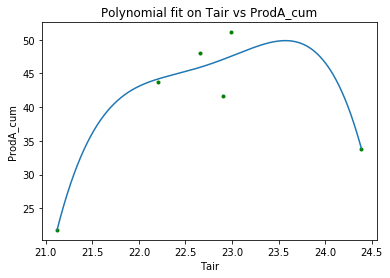

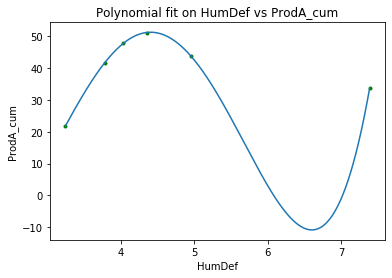

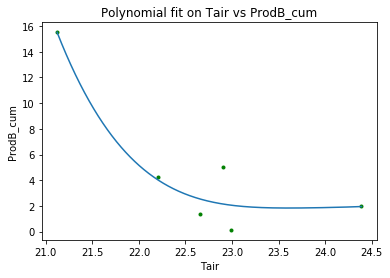

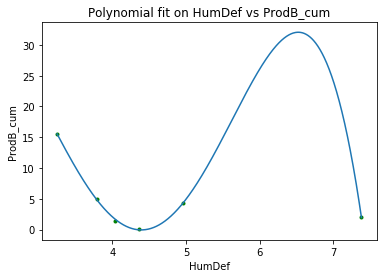

In [266]:
def polynome(params, linspace):
    if len(params)==3:
        a,b,c = params
        return [a*i**2+b*i+c for i in linspace]
    if len(params)==4:
        a,b,c,d = params
        return [a*i**3+b*i**2+c*i+d for i in linspace]
    if len(params)==5:
        a,b,c,d,e = params
        return [a*i**4+b*i**3+c*i**2+d*i+e for i in linspace]
    if len(params)==6:
        a,b,c,d,e,f = params
        return [a*i**5+b*i**4+c*i**3+d*i**2+e*i+f for i in linspace]
    if len(params)==7:
        a,b,c,d,e,f,g = params
        return [a*i**6+b*i**5+c*i**4+d*i**3+e*i**2+f*i+g for i in linspace]

def plot_polynome(x,y, degree, x_name, y_name):
    plt.plot(x, y, '.g')
    params = np.polyfit(x,y, degree)
    plt.plot(np.linspace(min(x),max(x),1000), polynome(params, np.linspace(min(x),max(x),1000)))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(f'Polynomial fit on {x_name} vs {y_name}')
    plt.show()

# Ask for input
degree = 0
while not 2<=degree<=6:
    try:
        degree = int(input('Which degree of polynomial fitting would you like?'))
        if not 2<=degree<=6:
            print('Please chose an integer between 2 and 6')
    except ValueError:
        print('Please chose an integer between 2 and 6.')
if run == 'Yes':
    for x_name in ['prodA', 'prodB']:
        for y_name in ['CO2', 'HumDef']:
            x, y = weekly_data_total[x_name], weekly_data_total[y_name]
            plot_polynome(x,y, degree, x_name, y_name)
else:
     # Take the average of the features and the eventual production value of every team
    plot_data = dict()
    for category in ['ProdA_cum', 'ProdB_cum']:
        tair, hum_def, prod = [], [], []
        for team in teams:
            prod_df = data[team]['prod'][category]
            tair.append(data[team]['GHClim']['Tair'].mean())
            hum_def.append(data[team]['GHClim']['HumDef'].mean())
            prod.append(prod_df[prod_df.index[-1]])
#             plt.plot(hum_def, prod, '.', label=f'{team}:HumDef')   
        x, y = tair, prod
        plot_polynome(x,y, degree, 'Tair', category)
        x, y = hum_def, prod
        plot_polynome(x,y, degree, 'HumDef', category)